# Imports

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

dtype_mapping = {
    'propertyId': pd.StringDtype(),
    'localityName': 'category',
    'landMarks': pd.StringDtype(),
    'locality': pd.StringDtype(),
    'price': pd.Int64Dtype(),
    'nameOfSociety': pd.StringDtype(),
    'projectName': pd.StringDtype(),
    'carpetArea': pd.Int64Dtype(),
    'coveredArea': pd.Int64Dtype(),
    'carpetAreaSqft': pd.Int64Dtype(),
    'possessionStatus': pd.StringDtype(),
    'developerName': pd.StringDtype(),
    'flooringType': pd.StringDtype(),
    'floorNumber': pd.Int64Dtype(),
    'unitCountonFloor': pd.Int64Dtype(),
    'totalFloorNumber': pd.Int64Dtype(),
    'electricityStatus': pd.StringDtype(),
    'waterStatus': pd.StringDtype(),
    'longitude': pd.Float64Dtype(),
    'latitude': pd.Float64Dtype(),
    'transactionType': 'category',
    'facing': pd.StringDtype(),
    'ownershipType': pd.StringDtype(),
    'carParking': pd.StringDtype(),
    'furnished': 'category',
    'bedrooms': pd.Int64Dtype(),
    'bathrooms': pd.Int64Dtype(),
    'numberOfBalconied': pd.Int64Dtype(),
    'propertyType': 'category',
    'additionalRooms': pd.StringDtype(),
    'bookingAmountExact': pd.Int64Dtype(),
    'maintenanceChargesFrequency': 'category',
    'maintenanceCharges': pd.Int64Dtype(),
    'ageofcons': 'category',
    'isVerified': 'category',
    'listingTypeDesc': 'category',
    'premiumProperty': pd.BooleanDtype(),
    'noOfLifts': pd.Int64Dtype(),
    'propertyAmenities': pd.StringDtype(),
    'facilitiesDesc': pd.StringDtype(),
    'uuid': pd.StringDtype(),
    'flooringType_Vitrified': pd.BooleanDtype(),
    'flooringType_CeramicTiles': pd.BooleanDtype(),
    'flooringType_Marble': pd.BooleanDtype(),
    'flooringType_NormalTilesKotahStone': pd.BooleanDtype(),
    'flooringType_Granite': pd.BooleanDtype(),
    'flooringType_Wooden': pd.BooleanDtype(),
    'flooringType_Mosaic': pd.BooleanDtype(),
    'flooringType_Marbonite': pd.BooleanDtype(),
    'additionalRoom_PujaRoom': pd.BooleanDtype(),
    'additionalRoom_Study': pd.BooleanDtype(),
    'additionalRoom_Store': pd.BooleanDtype(),
    'additionalRoom_ServantRoom': pd.BooleanDtype(),
    'carParking_Open': pd.Int64Dtype(),
    'carParking_Covered': pd.Int64Dtype(),
    'ReservedParking': pd.BooleanDtype(),
}

COLUMNS_TO_DROP = [
        'unitCountonFloor',
        'electricityStatus',
        'waterStatus',
        'facing',
        'bookingAmountExact',
        'isVerified',
        'listingTypeDesc',
        'maintenanceCharges',
        'maintenanceChargesFrequency',
        'latitude',
        'longitude',
        'carParking_Open',
        'carParking_Covered',
        'numberOfBalconied',
        'premiumProperty',
        'projectName',
        'nameOfSociety',
        'url',
        'uuid',
        'carpetAreaSqft',
        'noOfLifts',
        'ownershipType',
        'possessionStatus',
        'propertyType',

        'flooringType_Vitrified',
        'flooringType_CeramicTiles',
        'flooringType_Marble',
        'flooringType_NormalTilesKotahStone',
        'flooringType_Granite',
        'flooringType_Wooden',
        'flooringType_Mosaic',
        'flooringType_Marbonite',

        'additionalRoom_PujaRoom',
        'additionalRoom_Study',
        'additionalRoom_Store',
        'additionalRoom_ServantRoom',
        
        'landMarks', 
        'locality', 
        'developerName']


df_train = pd.read_csv(
    '../Data/train.csv',
    dtype = dtype_mapping,
    index_col=0
)

df_train.fillna(pd.NA, inplace=True)

c:\Aditya Joshi\PuneHousePricePrediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_train = df_train.drop(
    columns=COLUMNS_TO_DROP
)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19252 entries, 61872777 to 75703109
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   localityName      19252 non-null  category
 1   price             19252 non-null  Int64   
 2   carpetArea        15435 non-null  Int64   
 3   coveredArea       18761 non-null  Int64   
 4   floorNumber       19105 non-null  Int64   
 5   totalFloorNumber  19207 non-null  Int64   
 6   transactionType   19249 non-null  category
 7   furnished         19214 non-null  category
 8   bedrooms          19252 non-null  Int64   
 9   bathrooms         19252 non-null  Int64   
 10  ageofcons         16566 non-null  category
 11  ReservedParking   15526 non-null  boolean 
dtypes: Int64(7), boolean(1), category(4)
memory usage: 1.9 MB


# Dataset Description and Notes

1. The details on locality of the property is given by these columns - [localityName, landMarks, locality]. Of these, localityName and locality are almost the same. A few values here and there are different. Different in the sense that for some rows,  for example locality has value "Pimple Saudagar" and localityName has value "Pimple Saudagar, Pimpri Chinchwad" or vice versa. That is, extra info in one of them. As for the landMarks column, it has landmarks in detail. It's not that useful for EDA as there are a lot lot more unique values for landmark than locality and localityName.
2. The price of the property is given in the price column. It's an integer throughout with few null values.
3. The name of the society/building/project is given in [nameOfSociety, projectName] columns. Like locality and localityName, these too have few unique values relative to the dataset size. Also, most of rows have same values for both these columns except a few hundred.
4. The area of the flat is given in [carpetArea, coveredArea] columns. The two areas are different. Generally, carpet area is smaller than covered area. Covered are also includes conventionally useless area like that of pillars, base, etc. In preliminary cleaning, I found that more number of carpetArea have null values than coveredArea. One good trick to impute carpetARea is to use coveredArea that is find relation between them to impute the values.
5. The column carpetAreaSqft gives the price per square feet of carpetArea.
6. The column possessionStatus is a categorical column describing the possession Status of the property with 3 possible values - 'Ready to Move', 'Under Construction' and 'Immediately'. However, there are a lot of missing values. Almost 25 percent.
7. The column developerName gives the name of the developer who has built or is building the project or society.
8. The column floorNumber is exactly what it looks like. It tells the floor number on which the flat is located in the building or apartment. The good thing is, it has almost no null values. The bad thing is, it's string type because of three specific unique values among rest of the numeric ones - 'Ground', 'Upper Basement' and 'Lower Basement'
9. For column 'unitCountonFloor' - I don't exactly know what it means. I thought it's the number of flats per floor. But, that might not be the case for all values because It also has values like 501, 703, etc. The 501 value might suggest 1st flat on 5th floor and the flat number is 501. I checked the occurrence of these weird values greater than 100 and they are very very few compared to others. The bad thing is almost half values are null. This column won't be useful for price prediction as the user generally doesn't care about the number of flats per floor.
10. The column totalFloorNumber gives the total number of floors in the building. Prelimary exploration showed a few outlier values like 100 and 200 but luckily, there are very few rows with these outlier values. Also a good thing is, there are very few null values in this column.
11. The column electricityStatus tells the condition of powercuts and electricity availability for that property. It's categorical with almost all values being category 'No/Rare Powercut' and rest categories combined don't even sum it to 100. The bad thing is half the values are null. And the rest half have just a single category except a few. Just from this I can tell that this feature isn't useful at all.
12. The column waterStatus is similar to electricityStatus but for water. Just like electricityStatus, here too half the rows are null and rest half have just a single value - '24 Hours Available' except a few of them. Similar to electricityStatus, this column or feature too seems useless at first glance.
13. The columns [longitude, latitude] are exactly what they look like. good thing is very few values are null. Bad thing is we don't exactly have a way of validating the data or checking for outliers and stuff. One tip is that this is bound by location of pune City. So, there's a upper and lower bound on the latitudes and longtitudes.
14. Column transactionType tells the type of transaction obviously. It's categorical with 2 majority categories being 'Resale' and 'New Property'. Rest of the categories ('Rent' and 'Others') combined don't even sum up to 50. So, they can be ignored probably. Also, because we don't want the rent transaction types. One more good thing is this column has only 35 null values.
15. The column facing tells the direction in which the property is facing like East, West, North-West, etc. This might look unimportant to a common man's eye. But, in India, there's something called Vastu that people believe in. According to that, the direction of the property is important. But, there are two unfortunate things about it. We can't quantify people's feelings and beliefs and how it affects the prices and second is that half the rows have null values.
16. The column ownershipType tells the type of ownership you get with the property. It's categorical with the four categories being 'Freehold', 'Co-operative Society', 'Leasehold' and 'Power of Attorney'. unfortunate thing is that 35-40 percent of the values are empty.
17. The columns [carParking_Open, carParking_Covered] have number of car parkings alloted for that property also in terms of whether those parkings are covered, open or one or many of both. They have integer values. There is a small issue though. There are some weird values in either or both columns like 15 or 503 or 201 which are obviously impossible. Here's what I think. When the property lister filled the details for properties with such values, they misinterpreted what they were supposed to fill. Maybe instead of filling the number of parking spaces alloted to the property, they filled total available parking spaces which would justify 15 as the value. Similary, someone might have filled the flat number as the parking ID for this value which might justify values like 203 and 501 where they look like flat numbers. Luckily, these weird numbers are few in quantity. Unfortunately though, more than half the values are null. Also for the rows where there are null values, either both carParking_Covered and carParking_Open are null or none of them are.
18. The column 'furnished' tells the furnishing type of the property. It's categorical with three categories - 'Unfurnished', 'Semi-furnished' and 'Furnished'. Good thing is, there are only a few hundred null values.
19. The columns [bedrooms, bathrooms] have the number of bedrooms and bathrooms obviously in numeric form except one unique value which is 'More than 10'. Both the columns have this value. However, the number of properties which have this value is negligible (less than 10). So, if needed, can be substituted as 11 or 15 or some number like that. Another good thing is, there are very few null values in these columns.
20. The column 'numberOfBalconied' is similar to bedrooms and bathrooms. It tells number of balconies in the property. It has all numeric values except one - 'More than 10'. But, there area only 2 rows with that value. Also, bad news is that almost 40 percent values are null.
21. The column 'propertyType' has the type of the apartment or property. It has 4 categories - 'Multistorey Apartment', 'Builder Floor Apartment', 'Studio Apartment' and 'Penthouse' with almost all of them being 'Multistorey Apartment'. Good thing is almost no rows have null values. I don't know the meaning of 'Builder Floor Apartment'. Here's what I found on google - "A builder floor apartment is a residential unit that is typically located on the ground, first, or second floor of a low-rise building. Each floor is a self-contained unit with its own entrance, and the owner has greater control over their personal space than in a flat or apartment."
22. The column bookingAmountExact tells the booking amount needed to be paid to reserve the flat or property before buying it. Sort of like retainers for lawyers. But, it doesn't seem relevant as price will be the target variable. And based on the price, this amount will be dependent. Also, half the values are empty.
23. The column 'maintenanceCharges' tells the maintenance charges that are to be paid by the owner of the property once they buy it. These charges are periodic.
24. The column 'maintenanceChargesFrequency' tells the frequency of maintenance charges to be paid by the owner.
25. The column 'ageofcons' is a categorical column that gives the age of construction of that property or the building the property is located in. The categories are ['Less than 5 years', 'Under Construction', '5 to 10 years', 'New Construction', '10 to 15 years', '15 to 20 years', 'Above 20 years']. Sort of bad thing is that almost 15 percent values are null.
26. The column 'isVerified' is a categorical column telling the verification details of the property by the real estate site. The categories are 'Yes', 'No' and 'Others'. Most of them are 'No'. None of the values are null. But, I don't think this will be a relevant feature because it's too specific to this website and is not reproducible. And it's not a feature inherent to a property.
27. The column 'listingTypeDesc' tells us the type of listing it is in specific terms. It's categorical with these categories - ['Standard', 'Premium', 'Prime', 'Certified', 'Titanium', 'Platinum']. The good thing is that very few rows are null. The unfortunate thing is that just like the 'isVerified' column, this feature is not inherent to a property. It's specific to the website and is not reproducible and cannot be taken as an input for new data point when prediciting price.
28. The column 'premiumProperty' is a boolean column. It tells whether a property is Premium or not. Again, this is not an inherent characteristic of the property istelf. And the classification criterion for a property being premium is subjective. So, this feature too seems useless for price prediction.
29. The column 'noOfLifts' gives the number of lifts or elevator units present in the property or the building housing the property. It's numeric with values ranging from 1 to 10. So, there are no outliers. But, more than half the values are null.
30. The column 'uuid' contains the UUIDs I created and assigned to each row.
31. There are a few columns with prefix 'flooringType' with the suffix as the specific flooring type. These are the columns - [flooringType_Vitrified, flooringType_CeramicTiles, flooringType_Marble, flooringType_NormalTilesKotahStone, flooringType_Granite, flooringType_Wooden, flooringType_Mosaic, flooringType_Marbonite]. They are boolean columns. They basically tell if that property has or doesn't have these specific flooring types. They also contain Null values.
32. There are a few columns with prefix 'additionalRoom' with the suffix as the specific additional room. These are the columns - [additionalRoom_PujaRoom, additionalRoom_Study, additionalRoom_Store, additionalRoom_ServantRoom]
33. The columns [propertyId, URL] are just metadata columns for the properties. They can't be used for prediction obviously, but can be useful for other things. Let's not touch them for now.
34. The columns [facilitiesDesc, propertyAmenities] have the same data but in different formats. So, I only considered facilitiesDesc column. This column has a list in form of string which gives the amenities the property has. The issue was that there were too many unique amenties. So, I created another dataset entirely for this. In it, there's uuid column to match property with the amenities and each unique amenity as a boolean column. These columns have True if the property has that specific amenity and False if it doesn't. There are no null values. There's a major issue with this. There are sooo many amenities which have very very low number of true values. We should probably cut them down.

# EDA

## STeps and Pipeline

- Similar Localities merging (Only name wise) (TBD in Preliminary cleaning)

1. Missing Data Handling:
    - carpetArea from coveredArea
    - For ageofcons, check - KNN Imputation, XGBoost, Random Forest, etc.
    - Reserved Parking using
        - Domain Knowledge (If area and price greater than a certain threshold, then True) 
        - KNN Imputation, XGBoost, Random Forest, etc.
2. Feature Engineering:
    - Drop columns:
        1. posessionStatus [Very high cardinality - more than 99% values belong to one of the categories]
        2. bathrooms [Extremely highly correlated with bedrooms]
        3. propertyType [Very high cardinality - more than 96% values belong to one of the categories]
        4. coveredArea [Very highly correlated with carpetArea]
    - Modify columns:
        1. Merge localityNames which have similar price trends to reduce dimensionality. Or use PCA, t-SNE, etc.
3. Feature Selection:
    - Drop columns:
        1. CHECK AFTER FEATURE SELECTION
4. Create an SKLearn Pipeline for all of this

In [ ]:
report = ProfileReport(
    df=df_train,
    title="EDA on Training Data",
)
report.to_file("Reports/EDAonTrainingDataV1.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]


## Analysis

### Project Names

In [ ]:
df_train['projectName'].value_counts().sort_values(ascending=False)

projectName
Kolte Patil Life Republic    127
Panchshil Towers             108
Gera World Of Joy             72
Marvel Zephyr                 57
Majestique Towers             56
                            ... 
Siya Apartment 2               1
Shree Krupa                    1
Behula Apartment               1
Project Geeta Society          1
Green Crest                    1
Name: count, Length: 5636, dtype: Int64

In [ ]:
df2 = df_train.groupby('projectName').filter(lambda x: x.shape[0] > 7)
df2 = df2.astype(
    {
        key: value for key, value in dtype_mapping.items() if key in df2.columns
    }
)
df2['floorRatio'] = df2['floorNumber'] / df2['totalFloorNumber']
idx = df2.loc[df2['floorNumber'] < 0].index
df2.drop(labels=idx, axis='rows', inplace=True)

In [45]:
gb = df2.groupby('projectName').filter(lambda x: x.shape[0] > 7).groupby('projectName') 

In [63]:
px.scatter(gb.get_group(list(gb.groups.keys())[0]), x='price', y='floorRatio')

# Missing Values

<Axes: >

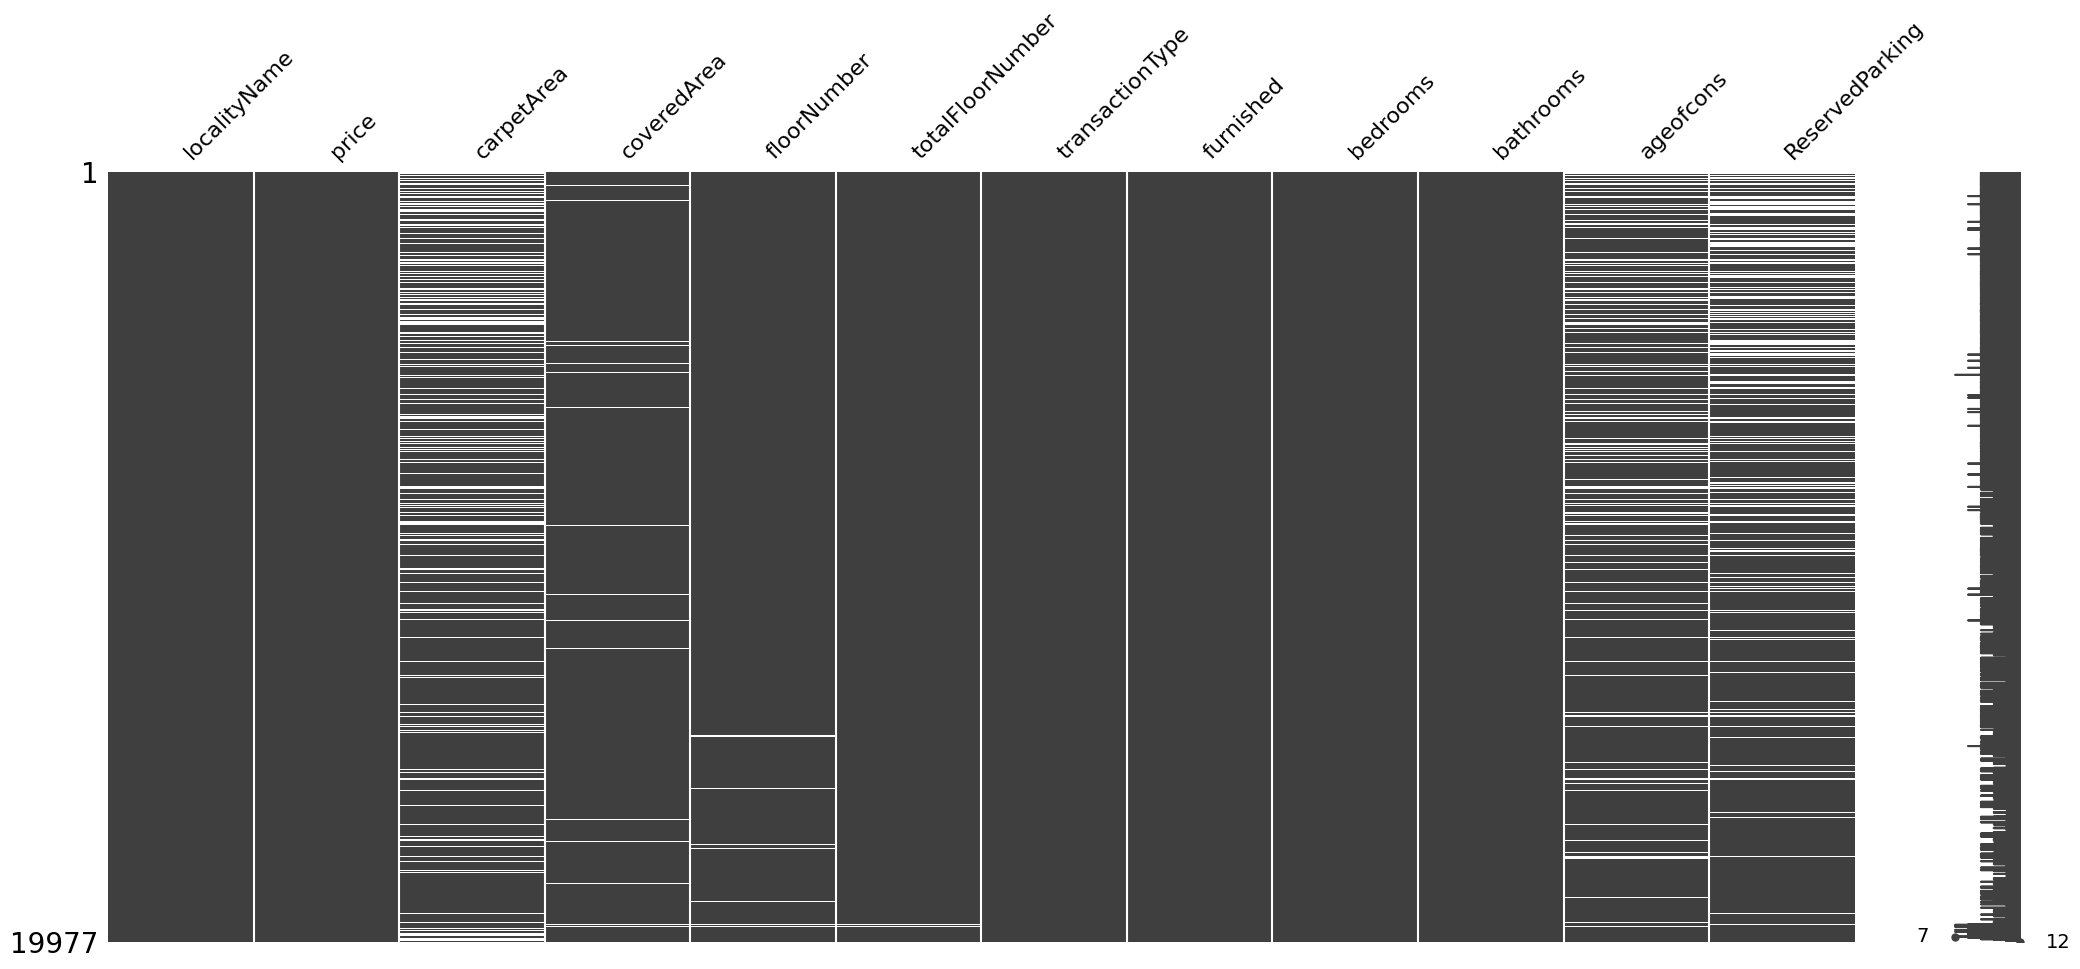

In [ ]:
msno.matrix(df_train.sort_values(['price', 'coveredArea']))

In [124]:
df_train.isna().sum()

localityName           0
price                  0
carpetArea          3925
coveredArea          498
floorNumber          147
totalFloorNumber      45
transactionType        3
furnished             44
bedrooms               0
bathrooms              0
ageofcons           2746
ReservedParking     3905
dtype: int64

### Carpet Area

- Carpet area is very highly correlated with Covered area

#### Ratio of carpetArea to coveredArea

In [ ]:
(df_train['carpetArea'] / df_train['coveredArea']).describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     15554.0
mean     0.746544
std      0.060448
min      0.369697
5%       0.679819
10%      0.709091
25%      0.719873
50%         0.725
75%      0.765926
90%      0.820513
95%      0.864228
99%           1.0
max           1.0
dtype: Float64

##### Observations

- 80% of the data has the ratio between 0.7 to 0.82. This is a good thing - the variation and standard deviation is less. We can use this for imputation of carpetArea

#### Checking if the missing values are random or not

In [ ]:
df_train.describe()

,price,carpetArea,coveredArea,floorNumber,totalFloorNumber,bedrooms,bathrooms
count,19977.0,16052.0,19479.0,19830.0,19932.0,19977.0,19977.0
mean,11396227.015818,957.892599,1237.016839,6.848159,12.831527,2.19117,2.202833
std,14697910.935709,630.914503,842.012449,5.009134,7.414308,0.882259,0.93897
min,600000.0,135.0,200.0,0.0,1.0,1.0,1.0
25%,4600000.0,626.0,759.0,3.0,7.0,2.0,2.0
50%,7500000.0,800.0,1050.0,6.0,12.0,2.0,2.0
75%,12000000.0,1100.0,1405.0,9.0,16.0,3.0,3.0
max,350581554.0,9528.0,13254.0,40.0,46.0,8.0,11.0


In [ ]:
df_train.loc[df_train['carpetArea'].isnull()].describe()

,price,carpetArea,coveredArea,floorNumber,totalFloorNumber,bedrooms,bathrooms
count,3925.0,0.0,3925.0,3912.0,3920.0,3925.0,3925.0
mean,10012660.278471,<NA>,1082.196688,5.611708,9.283929,1.894013,1.911592
std,16941342.394256,<NA>,905.893463,3.891825,5.337475,0.874067,0.943663
min,600000.0,<NA>,200.0,0.0,1.0,1.0,1.0
25%,3500000.0,<NA>,600.0,3.0,5.0,1.0,1.0
50%,5500000.0,<NA>,850.0,5.0,8.0,2.0,2.0
75%,9000000.0,<NA>,1150.0,7.0,12.0,2.0,2.0
max,170000000.0,<NA>,8486.0,32.0,41.0,8.0,10.0


##### Observations

- The rows where carpetArea is null, have on average relatively lower prices, coveredArea, bedrooms, etc.
- But, there's still a significant overlap between the two. So, we cannot conclude that the missing carpetArea values belong to a certain category. Maybe hypothesis testing is needed.

#### Correlation Matrix

In [ ]:
df_train[['carpetArea', 'coveredArea', 'bedrooms', 'bathrooms', 'price']].corr('pearson').loc['carpetArea']

carpetArea     1.000000
coveredArea    0.987987
bedrooms       0.792858
bathrooms      0.820358
price          0.906264
Name: carpetArea, dtype: float64

##### Observations

- These columns are highly linearly correlated with each other.
- We can use Linear regression to impute carpetArea
- But, we can't use price as it's the target variable. May cause target leakage.

#### Trying Linear Regression and KNN for imputation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

# Assume df is your original training DataFrame.

# 1. Separate rows with non-missing and missing carpetArea
df_complete = df_train[df_train['carpetArea'].notna()].copy()
df_missing = df_train[df_train['carpetArea'].isna()].copy()

# 2. Define predictor features.
# We deliberately exclude 'price' to avoid inadvertently introducing target leakage.
predictors = ["coveredArea", "bedrooms", "bathrooms", "floorNumber", "totalFloorNumber"]

# For our complete-case training, drop rows with missing predictor values
df_complete = df_complete.dropna(subset=predictors)

# Prepare X (predictors) and y (target)
X = df_complete[predictors]
y = df_complete["carpetArea"]

# 3. Define a 5-fold cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create pipelines that include standardization
# Linear Regression Pipeline
pipeline_lin = make_pipeline(StandardScaler(), LinearRegression())

# KNN Regression Pipeline (using k=5)
pipeline_knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# 5. Evaluate Linear Regression Pipeline using cross-validation with MAE
cv_scores_lin = cross_val_score(
    pipeline_lin, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_lin = -np.mean(cv_scores_lin)
print(f"Linear Regression MAE: {mae_lin:.2f}")

# 6. Evaluate KNN Regression Pipeline using cross-validation with MAE
cv_scores_knn = cross_val_score(
    pipeline_knn, X, y, cv=kf, scoring="neg_mean_absolute_error"
)
mae_knn = -np.mean(cv_scores_knn)
print(f"KNN Regression MAE: {mae_knn:.2f}")

Linear Regression MAE: 53.02
KNN Regression MAE: 64.37


In [60]:
# Fit the chosen pipeline on all complete data.
pipeline_lin.fit(X, y)

# 8. For the rows with missing carpetArea, ensure that predictor values exist.
df_missing = df_missing.dropna(subset=predictors).copy()
X_missing = df_missing[predictors]

# Predict and impute carpetArea for the missing rows.
imputed_values = pipeline_lin.predict(X_missing)
df_missing["carpetArea"] = imputed_values

# 9. Recombine the complete and imputed missing rows back into one DataFrame.
df_imputed = pd.concat([df_complete, df_missing]).sort_index()

In [61]:
df_imputed['carpetArea'].describe()

count        19364.0
mean      920.902475
std       630.956032
min            135.0
25%       567.624281
50%       772.102538
75%      1054.810666
max           9528.0
Name: carpetArea, dtype: Float64

In [ ]:
df_train['carpetArea'].describe()

count       16052.0
mean     957.892599
std      630.914503
min           135.0
25%           626.0
50%           800.0
75%          1100.0
max          9528.0
Name: carpetArea, dtype: Float64

### Final Pipeline and Other Columns

In [17]:
df_train = pd.read_csv(
    '../Data/train.csv',
    dtype = dtype_mapping,
    index_col=0
)

df_train.fillna(pd.NA, inplace=True)

df_train = df_train.drop(columns = COLUMNS_TO_DROP)

#### Imputing Carpet Area

In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# -----------------------------
# Step 1: Impute carpetArea using Linear Regression
# -----------------------------

# Separate rows where carpetArea is present vs. missing
df_full = df_train[df_train["carpetArea"].notna()].copy()
df_missing = df_train[df_train["carpetArea"].isna()].copy()

# The predictors for carpetArea are: coveredArea, bedrooms, and bathrooms.
predictors = ["coveredArea", "bedrooms", "bathrooms"]

# In the df_full set, drop any rows where one of the predictors is missing
df_full = df_full.dropna(subset=predictors).copy()

# Prepare training data for the regression
X_reg = df_full[predictors]
y_reg = df_full["carpetArea"]

# Scale the predictor variables
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Fit a simple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_reg_scaled, y_reg)

# Now, for rows where carpetArea is missing, predict using the regression model,
# but only do this for rows that have non-missing predictor values.
mask_predictors = df_missing[predictors].notna().all(axis=1)
if mask_predictors.sum() > 0:
    X_missing = df_missing.loc[mask_predictors, predictors]
    X_missing_scaled = scaler_reg.transform(X_missing)
    pred_carpet = lr_model.predict(X_missing_scaled)
    df_missing.loc[mask_predictors, "carpetArea"] = pred_carpet.astype(int)

# Merge the imputed carpetArea values back into the main dataframe.
# (For rows where predictors were still missing in df_missing, carpetArea remains NaN.)
df_train.update(df_missing)

#### Encoding Features

In [20]:
# -----------------------------
# Step 2: Feature Encoding (excluding 'price' and 'localityName')
# -----------------------------

# Create a new dataframe for further processing (imputation, scaling, encoding)
df_features = df_train.drop(columns=["price", "localityName"]).copy()

# --- Define the transformer for the ReservedParking column ---
# ReservedParking is a boolean column. We want to convert it into a numeric
# column such that: True -> 1, False -> -1, and leave any missing values as NaN.
def map_reserved_vals(X: pd.Series):
    # X is assumed to be a 2D numpy array.
    mapped = []
    for val in X.to_numpy().ravel():
        if pd.isna(val):
            mapped.append(np.nan)
        else:
            mapped.append(1 if val else -1)
    return np.array(mapped).reshape(-1, 1)

reserved_transformer = FunctionTransformer(map_reserved_vals, validate=False)

# --- Define pipelines for each group of columns ---

# (1) Numeric features: carpetArea, coveredArea, floorNumber, totalFloorNumber
numeric_features = ["carpetArea", "coveredArea", "floorNumber", "totalFloorNumber", "bedrooms", "bathrooms"]
numeric_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# (2) ReservedParking pipeline:
# First convert using our custom mapper, then standardize.
reserved_pipeline = Pipeline(steps=[
    ("mapper", reserved_transformer),
    ("scaler", StandardScaler())
])

# (3) transactionType pipeline: fill missing with "missing" then one-hot encode.
transaction_categories = [['missing', 'Resale', 'New Property']]
transaction_pipeline = Pipeline(steps=[
    (
        "imputer",
        SimpleImputer(strategy="constant", fill_value="missing")
    ),
    (
        "ordinal",
        OrdinalEncoder(categories=transaction_categories)
    )
])

# (4) furnished pipeline: fill missing with "missing" then one-hot encode.
furnished_categories = [['missing', 'Unfurnished', 'Semi-Furnished', 'Furnished']]
furnished_pipeline = Pipeline(steps=[
    (
        "imputer",
        SimpleImputer(strategy="constant", fill_value="missing")
    ),
    (
        "ordinal",
        OrdinalEncoder(categories=furnished_categories)
    )
])

# (5) ageofcons pipeline: fill missing with "missing" then ordinally encode.
# Define a custom ordering for ageofcons.
# Here we place "missing" at one extreme.
age_categories = [
    ["missing", "Under Construction", "New Construction",
     "Less than 5 years", "5 to 10 years", "10 to 15 years",
     "15 to 20 years", "Above 20 years"]
]

age_pipeline = Pipeline(steps=[
    (
        "imputer",
        SimpleImputer(strategy="constant", fill_value="missing")
    ),
    (
        "ordinal",
        OrdinalEncoder(categories=age_categories)
    )
])

# --- Combine all the pipelines using a ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("reserved", reserved_pipeline, ["ReservedParking"]),
        ("trans", transaction_pipeline, ["transactionType"]),
        ("furn", furnished_pipeline, ["furnished"]),
        ("age", age_pipeline, ["ageofcons"])
    ],
    remainder="passthrough"  # (if there are any additional columns)
)

# Fit the preprocessor on the features dataframe.
encoded_features = preprocessor.fit_transform(df_features)

# -----------------------------
# Save the pipelines for use on test data
# -----------------------------
joblib.dump(preprocessor, "preprocessor_pipeline.pkl")
joblib.dump(scaler_reg, "scaler_reg.pkl")
joblib.dump(lr_model, "lr_model.pkl")

['lr_model.pkl']

In [21]:
encoded_features

array([[-0.76579908, -0.7502445 , -0.37288994, ...,  1.        ,
         1.        ,  4.        ],
       [-0.44565771, -0.41319613, -1.17614423, ...,  1.        ,
         1.        ,  3.        ],
       [ 0.38701765,  0.30787598,  2.43850008, ...,  1.        ,
         2.        ,  3.        ],
       ...,
       [ 0.25619065,  0.24680798,  0.43036435, ...,  1.        ,
         2.        ,  0.        ],
       [ 0.11151138,  0.10588184,  0.22955078, ...,  2.        ,
         1.        ,  1.        ],
       [-0.42564888, -0.39323159,  0.22955078, ...,  1.        ,
         2.        ,  3.        ]])

In [22]:
import numpy as np
import pandas as pd
import joblib

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import time
import warnings
from xgboost import XGBRegressor

# -----------------------------
# Load saved pipelines and models from earlier steps
# -----------------------------
# These were saved in the previous section.

preprocessor = joblib.load("preprocessor_pipeline.pkl")
scaler_reg = joblib.load("scaler_reg.pkl")
lr_model = joblib.load("lr_model.pkl")

numeric_features = ["carpetArea", "coveredArea", "floorNumber", "totalFloorNumber", "bedrooms", "bathrooms"]

# Helper function to get encoded feature names from our custom preprocessor
def get_feature_names(preprocessor, numeric_features):
    feature_names = []
    # 1. Numeric pipeline (carpetArea, coveredArea, floorNumber, totalFloorNumber)
    for feature in numeric_features:
        feature_names.append("num__" + feature)
        
    # 2. ReservedParking: we only have one column.
    feature_names.append("reserved__ReservedParking")
    
    # 3. transactionType pipeline (OneHotEncoder)
    feature_names.append('trans_transactionType')
    
    # 4. furnished pipeline (OneHotEncoder)
    feature_names.append('furn_furnished')
    
    # 5. ageofcons pipeline (ordinal encoded; only one output column)
    feature_names.append("age__ageofcons")
    
    return feature_names

# Make sure that 'numeric_features' is defined in your code above.
encoded_columns = get_feature_names(preprocessor, numeric_features)



# Assume you still have your train_df and df_features (which is
# train_df without the 'price' and 'localityName' columns)
# Also, note that df_features was used to create the encoded features.
# Let’s re-create the encoded feature matrix (with missing values intact)
encoded_features = preprocessor.transform(df_features)
# encoded_columns = get_feature_names(preprocessor, numeric_features)
df_encoded_all_temp = pd.DataFrame(
    encoded_features, columns=encoded_columns, index=df_features.index
)

df_encoded_all = df_encoded_all_temp.copy()
df_encoded_all['furn_furnished'] = df_encoded_all['furn_furnished'].replace({0.0: np.nan})
df_encoded_all['trans_transactionType'] = df_encoded_all['trans_transactionType'].replace({0.0: np.nan})
df_encoded_all['age__ageofcons'] = df_encoded_all['age__ageofcons'].replace({0.0: np.nan})


In [23]:
df_encoded_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19252 entries, 61872777 to 75703109
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num__carpetArea            19252 non-null  float64
 1   num__coveredArea           18761 non-null  float64
 2   num__floorNumber           19105 non-null  float64
 3   num__totalFloorNumber      19207 non-null  float64
 4   num__bedrooms              19252 non-null  float64
 5   num__bathrooms             19252 non-null  float64
 6   reserved__ReservedParking  15526 non-null  float64
 7   trans_transactionType      19249 non-null  float64
 8   furn_furnished             19214 non-null  float64
 9   age__ageofcons             16566 non-null  float64
dtypes: float64(10)
memory usage: 2.1 MB


In [24]:
df_encoded_all['age__ageofcons'].value_counts()

age__ageofcons
3.0    5154
1.0    3847
4.0    3525
2.0    2567
5.0    1072
6.0     246
7.0     155
Name: count, dtype: int64

#### Comparing different Imputers

In [28]:

# -----------------------------
# Step 1. Create a complete dataset by dropping rows with any missing
# -----------------------------
df_complete = df_encoded_all.dropna().copy()
print("Shape of complete dataset for CV:", df_complete.shape)

# -----------------------------
# Step 2. Inject strategic missingness (15% per column)
# -----------------------------
df_strategic = df_complete.copy()
np.random.seed(42)
mask_dict = {}  # To store indices set to missing (if needed later)
for col in df_strategic.columns:
    n_rows = len(df_strategic)
    n_missing = int(round(0.15 * n_rows))
    missing_indices = np.random.choice(df_strategic.index, n_missing, replace=False)
    df_strategic.loc[missing_indices, col] = np.nan
    mask_dict[col] = missing_indices

# -----------------------------
# Step 3. Define imputer configurations
# -----------------------------
imputer_configs = {
    # "KNN_25": KNNImputer(n_neighbors=25, weights="uniform"),
    # "KNN_50": KNNImputer(n_neighbors=50, weights="uniform"),
    # "KNN_75": KNNImputer(n_neighbors=75, weights="uniform"),
    # "KNN_distance_25": KNNImputer(n_neighbors=25, weights="distance"),
    # "KNN_distance_50": KNNImputer(n_neighbors=50, weights="distance"),
    # "KNN_distance_75": KNNImputer(n_neighbors=75, weights="distance"),
    # "Iterative_RF_20": IterativeImputer(
    #     estimator=RandomForestRegressor(n_estimators=20, random_state=42),
    #     random_state=42,
    #     max_iter=20
    # ),
    # "Iterative_RF_50": IterativeImputer(
    #     estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    #     random_state=42,
    #     max_iter=10
    # ),
    # "Iterative_RF_75": IterativeImputer(
    #     estimator=RandomForestRegressor(n_estimators=75, random_state=42),
    #     random_state=42,
    #     max_iter=10
    # ),
    "Iterative_KNN_25": IterativeImputer(
        estimator=KNeighborsRegressor(n_neighbors=25),
        random_state=42,
        max_iter=20
    ),
    "Iterative_KNN_30": IterativeImputer(
        estimator=KNeighborsRegressor(n_neighbors=30),
        random_state=42,
        max_iter=20
    ),
    "Iterative_KNN_20": IterativeImputer(
        estimator=KNeighborsRegressor(n_neighbors=20),
        random_state=42,
        max_iter=20
    ),
    # "Iterative_XGB_100": IterativeImputer(
    #     estimator=XGBRegressor(n_estimators=100),
    #     random_state=42,
    #     max_iter=20
    # ),
    # "Iterative_BR": IterativeImputer(estimator=BayesianRidge(), random_state=42, max_iter=20)
}

# -----------------------------
# Step 4. Cross-validation to evaluate imputers on strategic-missing dataset
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Convert both complete and strategic dataframes to numpy arrays.
X_true = df_complete.astype(float).values.copy()      # Ground truth values
X_strategic = df_strategic.astype(float).values.copy()  # With injected NaNs

imputer_scores = {key: [] for key in imputer_configs}

for imputer_name, imputer in imputer_configs.items():
    start = time.time()
    fold_mae_scores = []
    for train_idx, test_idx in kf.split(X_strategic):
        X_train = X_strategic[train_idx]
        X_test = X_strategic[test_idx]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # Fit imputer on training data
            imputer.fit(X_train)
            # Impute test data
            X_test_imputed = imputer.transform(X_test)
            # Create a boolean mask: True where test data was intentionally missing
            test_mask = np.isnan(X_test)
            # Only compute error over these positions
            if np.sum(test_mask) > 0:
                mae = mean_absolute_error(
                    X_true[test_idx][test_mask], X_test_imputed[test_mask]
                )
                fold_mae_scores.append(mae)
    avg_mae = np.mean(fold_mae_scores)
    imputer_scores[imputer_name] = {}
    imputer_scores[imputer_name]["MAE"] = pd.Series(fold_mae_scores)
    print(f"Average MAE for {imputer_name}: {avg_mae:.4f} with time taken: {time.time() - start}")

Shape of complete dataset for CV: (14073, 10)
Average MAE for Iterative_KNN_25: 0.3662 with time taken: 82.23039698600769
Average MAE for Iterative_KNN_30: 0.3669 with time taken: 103.77113056182861
Average MAE for Iterative_KNN_20: 0.3651 with time taken: 81.26697993278503


In [14]:
# -----------------------------
# Step 5. Identify best imputer and apply it to the full (original) encoded dataset
# -----------------------------
di = {key: value['MAE'] for key, value in imputer_scores.items()}
pd.DataFrame(di).describe()

,KNN_25,KNN_50,KNN_75,KNN_distance_25,KNN_distance_50,KNN_distance_75,Iterative_KNN_50,Iterative_XGB_500,Iterative_BR
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.423130,0.415957,0.414610,0.511197,0.510341,0.510181,0.369131,0.400720,0.390632
std,0.017884,0.019438,0.020551,0.016712,0.017054,0.017256,0.026727,0.034882,0.038594
min,0.391641,0.381432,0.378088,0.482168,0.480697,0.480133,0.322017,0.338425,0.322122
25%,0.428765,0.422122,0.420752,0.511656,0.511027,0.511122,0.376376,0.413590,0.400575
50%,0.429045,0.423314,0.422856,0.519504,0.518696,0.518595,0.377598,0.415140,0.407008
75%,0.429764,0.424635,0.424119,0.521231,0.519619,0.519441,0.381636,0.418023,0.409830
max,0.436437,0.428281,0.427235,0.521425,0.521665,0.521613,0.388026,0.418422,0.413626


In [29]:
best_imputer_name = 'Iterative_KNN_20'
best_imputer = imputer_configs[best_imputer_name]

In [30]:
joblib.dump(best_imputer, "Iterative_KNN_20.pkl")

['Iterative_KNN_20.pkl']

#### Imputing all values using best estimator

In [31]:
best_imputer = joblib.load("Iterative_KNN_20.pkl")

final_imputed_array = best_imputer.fit_transform(df_encoded_all.values)
df_imputed_final = pd.DataFrame(
    final_imputed_array, columns=encoded_columns, index=df_encoded_all.index
)


c:\Aditya Joshi\PuneHousePricePrediction\.venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
df_imputed_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19252 entries, 61872777 to 75703109
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num__carpetArea            19252 non-null  float64
 1   num__coveredArea           19252 non-null  float64
 2   num__floorNumber           19252 non-null  float64
 3   num__totalFloorNumber      19252 non-null  float64
 4   num__bedrooms              19252 non-null  float64
 5   num__bathrooms             19252 non-null  float64
 6   reserved__ReservedParking  19252 non-null  float64
 7   trans_transactionType      19252 non-null  float64
 8   furn_furnished             19252 non-null  float64
 9   age__ageofcons             19252 non-null  float64
dtypes: float64(10)
memory usage: 2.1 MB


#### Inverse transform / Reverse Feature decoding

In [33]:

# -----------------------------
# Step 6. Inverse transformations to recover original feature representations
# -----------------------------
# 6a. Numeric features (carpetArea, coveredArea, floorNumber, totalFloorNumber)
# These came from the "num" transformer.
numeric_cols = [col for col in df_imputed_final.columns if col.startswith("num__")]
num_scaler = preprocessor.named_transformers_["num"].named_steps["scaler"]
df_num = pd.DataFrame(
    num_scaler.inverse_transform(df_imputed_final[numeric_cols]),
    columns=[col.split("__")[1] for col in numeric_cols],
    index=df_imputed_final.index
)

# 6b. ReservedParking (boolean mapped to numeric -1,1)
reserved_cols = [col for col in df_imputed_final.columns if col.startswith("reserved")]
# Define a helper function for inverse mapping.
def invert_reserved(arr):
    # First, reverse the StandardScaler used in the reserved pipeline.
    reserved_scaler = (
        preprocessor.named_transformers_["reserved"].named_steps["scaler"]
    )
    arr_inv = reserved_scaler.inverse_transform(arr)
    # In our custom mapper we did: True -> 1, False -> -1.
    # Here we use a simple threshold: >0 maps to True; else False.
    inverted = []
    for val in arr_inv.ravel():
        if pd.isna(val):
            inverted.append(np.nan)
        else:
            inverted.append(True if val > 0 else False)
    return np.array(inverted).reshape(-1, 1)

reserved_inv = invert_reserved(df_imputed_final[reserved_cols].values)
df_reserved = pd.DataFrame(
    reserved_inv, columns=["ReservedParking"], index=df_imputed_final.index
)

# 6c. transactionType: ordinal encoded in the "trans" pipeline.
trans_cols = [col for col in df_imputed_final.columns if col.startswith("trans")]
trans_encoder = (
    preprocessor.named_transformers_["trans"].named_steps["ordinal"]
)
trans_inv = trans_encoder.inverse_transform(df_imputed_final[trans_cols].values)
df_trans = pd.DataFrame(trans_inv, columns=["transactionType"],
                        index=df_imputed_final.index)

# 6d. furnished: ordinal encoded in the "furn" pipeline.
furn_cols = [col for col in df_imputed_final.columns if col.startswith("furn")]
furn_encoder = (
    preprocessor.named_transformers_["furn"].named_steps["ordinal"]
)
furn_inv = furn_encoder.inverse_transform(df_imputed_final[furn_cols].values)
df_furn = pd.DataFrame(furn_inv, columns=["furnished"],
                       index=df_imputed_final.index)

# 6e. ageofcons: ordinally encoded in the "age" pipeline.
age_cols = [col for col in df_imputed_final.columns if col.startswith("age")]
age_encoder = preprocessor.named_transformers_["age"].named_steps["ordinal"]
age_inv = age_encoder.inverse_transform(df_imputed_final[age_cols].values)
df_age = pd.DataFrame(age_inv, columns=["ageofcons"],
                      index=df_imputed_final.index)

# -----------------------------
# Step 7. Combine all inverse-transformed features and add back excluded ones
# -----------------------------
df_final_features = pd.concat(
    [df_num, df_reserved, df_trans, df_furn, df_age], axis=1
)

# The originally excluded columns are 'price' and 'localityName' (which we know
# have no missing values). We now combine them back.
df_final = pd.concat(
    [df_train[["price", "localityName"]], df_final_features], axis=1,
)

print("Final imputed and inverse-transformed dataset shape:",
      df_final.shape)

for cols in ['floorNumber', 'carpetArea' , 'coveredArea', 'totalFloorNumber', 'bedrooms', 'bathrooms']:
    df_final[cols] = df_final[cols].round(0).astype(pd.Int64Dtype())

# Optionally, save the final dataset and the best imputer for future usage.
df_final.to_csv("../Data/train_imputed.csv", index=True)

Final imputed and inverse-transformed dataset shape: (19252, 12)


In [48]:
temp_df = df_train.sample(5) 
idx = temp_df.index
temp_df

,localityName,price,carpetArea,coveredArea,floorNumber,totalFloorNumber,transactionType,furnished,bedrooms,bathrooms,ageofcons,ReservedParking
propertyId,,,,,,,,,,,,
57702405,Tathawade Pimpri Chinchwad,6510000,738,996,5,18,New Property,Unfurnished,2,2,Under Construction,True
75684425,Narhe,4000000,612,850,5,6,Resale,Unfurnished,2,2,Less than 5 years,True
67958461,"Ravet, Pimpri Chinchwad",5000000,620,830,4,4,Resale,Semi-Furnished,2,2,NaN,<NA>
55097815,Hinjewadi,11000000,1450,<NA>,4,21,Resale,Semi-Furnished,3,3,10 to 15 years,True
73034239,Balewadi,17522000,1380,1876,24,34,New Property,Unfurnished,3,3,Under Construction,True


In [49]:
df_final.loc[idx]

,price,localityName,carpetArea,coveredArea,floorNumber,totalFloorNumber,bedrooms,bathrooms,ReservedParking,transactionType,furnished,ageofcons
propertyId,,,,,,,,,,,,
57702405,6510000,Tathawade Pimpri Chinchwad,738,996,5,18,2,2,True,New Property,Unfurnished,Under Construction
75684425,4000000,Narhe,612,850,5,6,2,2,True,Resale,Unfurnished,Less than 5 years
67958461,5000000,"Ravet, Pimpri Chinchwad",620,830,4,4,2,2,True,Resale,Semi-Furnished,Less than 5 years
55097815,11000000,Hinjewadi,1450,1765,4,21,3,3,True,Resale,Semi-Furnished,10 to 15 years
73034239,17522000,Balewadi,1380,1876,24,34,3,3,True,New Property,Unfurnished,Under Construction


# Feature Engineering

1. Merge similar localities